In [1]:
# 01_EDA.ipynb

# ==============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) PARA FORMULACIONES DE PINTURA
# ==============================================================================

# Este notebook tiene como objetivo realizar un análisis exploratorio de los datos
# sintéticos de formulaciones de pintura. El propósito es entender la estructura
# de los datos, identificar patrones, relaciones entre variables y visualizar
# las características clave que podrían influir en el éxito o fracaso de una fórmula.
# Los hallazgos servirán como base para la selección de características y el diseño
# de modelos de Machine Learning.

# ------------------------------------------------------------------------------
# 1. Configuración Inicial y Carga de Datos
# ------------------------------------------------------------------------------

# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("--------------------------------------------------")
print("INICIANDO ANÁLISIS EXPLORATORIO DE DATOS (EDA)...")
print("--------------------------------------------------")

# Definir la ruta al archivo de datos CSV
# Aseguramos que la ruta es correcta sin importar desde dónde se abra el notebook.
# El notebook está en 'notebooks/', el archivo de datos en 'data/raw/'.
data_path = os.path.join(os.getcwd(), '..', 'data', 'raw', 'simulated_paint_data.csv')

# Verificar si el archivo existe antes de cargarlo
if not os.path.exists(data_path):
    print(f"ERROR: No se encontró el archivo de datos en: {data_path}")
    print("Por favor, asegúrate de haber ejecutado 'python src/data_generator.py' desde la raíz del proyecto.")
else:
    # Cargar el dataset
    df = pd.read_csv(data_path)
    print(f"Datos cargados exitosamente desde: {data_path}")
    print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")

    # Crear la carpeta 'plots' si no existe
    plots_dir = os.path.join(os.getcwd(), '..', 'plots')
    os.makedirs(plots_dir, exist_ok=True)
    print(f"Directorio para gráficos '{plots_dir}' asegurado/creado.")

--------------------------------------------------
INICIANDO ANÁLISIS EXPLORATORIO DE DATOS (EDA)...
--------------------------------------------------
Datos cargados exitosamente desde: C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\data\raw\simulated_paint_data.csv
Número de filas: 5000, Número de columnas: 16
Directorio para gráficos 'C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots' asegurado/creado.


In [2]:
# ------------------------------------------------------------------------------
# 2. Inspección Inicial del DataFrame
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("2. INSPECCIÓN INICIAL DEL DATAFRAME")
print("--------------------------------------------------")

# Mostrar las primeras 5 filas del DataFrame para una vista previa
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

# Mostrar información general del DataFrame (tipos de datos, valores no nulos)
print("\nInformación del DataFrame (df.info()):")
df.info()

# Mostrar estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas (df.describe()):")
print(df.describe().round(2))

# Conteo de valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())
if df.isnull().sum().sum() == 0:
    print("¡No hay valores nulos en el dataset!")
else:
    print("ATENCIÓN: Se encontraron valores nulos. Considerar el tratamiento.")



--------------------------------------------------
2. INSPECCIÓN INICIAL DEL DATAFRAME
--------------------------------------------------

Primeras 5 filas del DataFrame:
   resina_pct  pigmento_pct  solvente_pct  aditivo_pct calidad_resina  \
0   51.913836     27.892077     17.327241     2.866847           Baja   
1   55.376509     26.648223     13.117234     4.858034           Alta   
2   40.710202     35.518803     21.217569     2.553425           Baja   
3   67.446266     10.769719     18.308117     3.475898          Media   
4   56.845646     10.771970     31.675633     0.706751           Alta   

        tipo_pigmento tipo_solvente proveedor_aditivo  temperatura_mezcla_C  \
0     Óxido de Hierro        Xileno        ProveedorD             25.945116   
1     Óxido de Hierro        Xileno        ProveedorD             35.154382   
2            Orgánico          Agua        ProveedorA             59.142477   
3     Óxido de Hierro          Agua        ProveedorA             49.2153


--------------------------------------------------
3. ANÁLISIS DE LA VARIABLE OBJETIVO: 'exito'
--------------------------------------------------

Conteo de formulaciones 'Éxito' (1) y 'Falla' (0):
exito
1    3750
0    1250
Name: count, dtype: int64

Proporción de formulaciones 'Éxito' y 'Falla' (%):
exito
1    75.0
0    25.0
Name: proportion, dtype: float64


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\2577206635.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exito', data=df, palette='viridis')


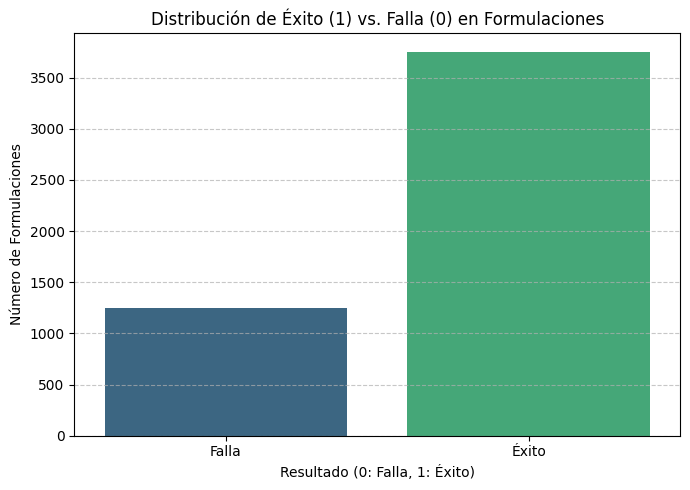

Gráfico 'distribucion_exito_falla.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Análisis para Leonardo:
Este gráfico muestra el balance entre formulaciones exitosas y fallidas. Es común ver un desbalance,
donde las fórmulas exitosas pueden ser más frecuentes en registros históricos de I+D.
Actualmente, tenemos un 75.00% de éxitos y un 25.00% de fallas.
Este desbalance es importante para seleccionar las métricas de evaluación del modelo (Precision, Recall, F1-Score) en el futuro,
ya que la 'Accuracy' por sí sola podría ser engañosa.


In [3]:
# ------------------------------------------------------------------------------
# 3. Análisis de la Variable Objetivo: 'exito'
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("3. ANÁLISIS DE LA VARIABLE OBJETIVO: 'exito'")
print("--------------------------------------------------")

# Conteo de ocurrencias de 'exito' (1) y 'falla' (0)
exito_counts = df['exito'].value_counts()
exito_proportions = df['exito'].value_counts(normalize=True) * 100

print(f"\nConteo de formulaciones 'Éxito' (1) y 'Falla' (0):\n{exito_counts}")
print(f"\nProporción de formulaciones 'Éxito' y 'Falla' (%):\n{exito_proportions.round(2)}")

# Visualización del desbalanceo de clases
plt.figure(figsize=(7, 5))
sns.countplot(x='exito', data=df, palette='viridis')
plt.title('Distribución de Éxito (1) vs. Falla (0) en Formulaciones')
plt.xlabel('Resultado (0: Falla, 1: Éxito)')
plt.ylabel('Número de Formulaciones')
plt.xticks([0, 1], ['Falla', 'Éxito'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'distribucion_exito_falla.png'))
plt.show()
print(f"Gráfico 'distribucion_exito_falla.png' guardado en {plots_dir}")

print("\nAnálisis para Leonardo:")
print("Este gráfico muestra el balance entre formulaciones exitosas y fallidas. Es común ver un desbalance,")
print("donde las fórmulas exitosas pueden ser más frecuentes en registros históricos de I+D.")
print(f"Actualmente, tenemos un {exito_proportions[1]:.2f}% de éxitos y un {exito_proportions[0]:.2f}% de fallas.")
print("Este desbalance es importante para seleccionar las métricas de evaluación del modelo (Precision, Recall, F1-Score) en el futuro,")
print("ya que la 'Accuracy' por sí sola podría ser engañosa.")


--------------------------------------------------
4. ANÁLISIS DE VARIABLES CATEGÓRICAS
--------------------------------------------------

Análisis para la columna: 'calidad_resina'
calidad_resina
Alta     40.0
Media    40.0
Baja     19.0
Name: proportion, dtype: float64


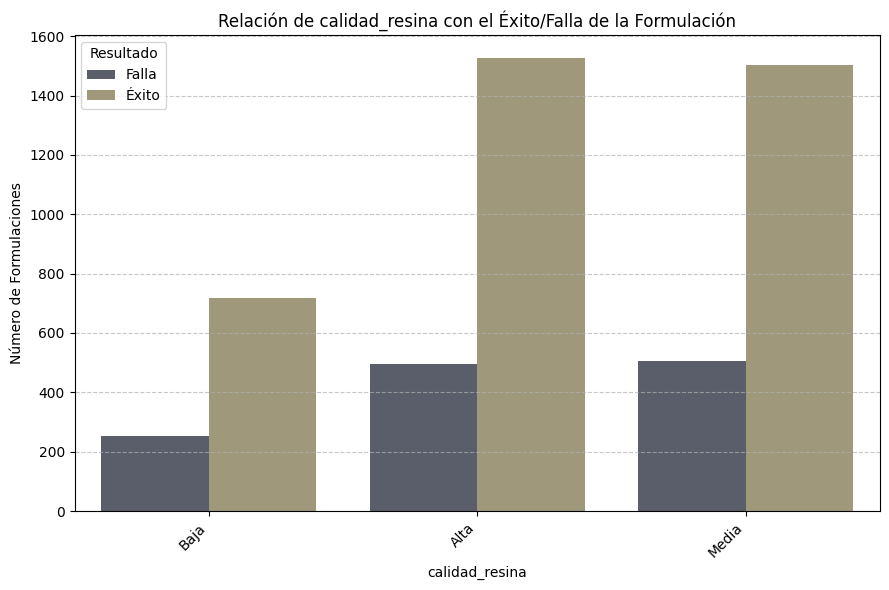

Gráfico 'relacion_calidad_resina_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre calidad_resina:
Este gráfico muestra cómo la 'Calidad de la Resina' influye en el éxito. Podemos observar, por ejemplo,
que una 'Resina de Alta Calidad' tiene una mayor proporción de éxitos. Esto confirma su importancia como químico formulador.
El modelo debería aprender a darle peso a esta característica.

Análisis para la columna: 'tipo_pigmento'
tipo_pigmento
Dióxido de Titanio    50.0
Óxido de Hierro       31.0
Orgánico              20.0
Name: proportion, dtype: float64


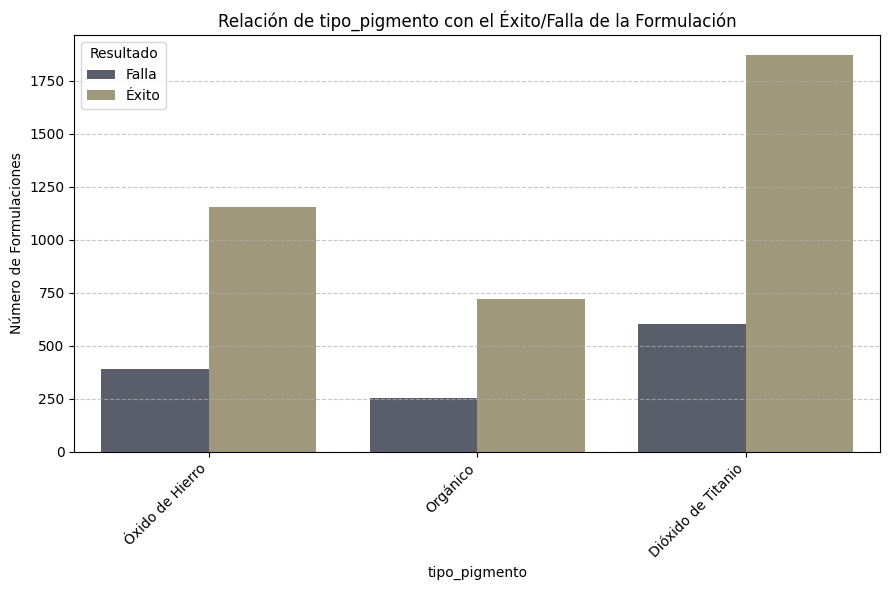

Gráfico 'relacion_tipo_pigmento_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre tipo_pigmento:
Aquí vemos la relación entre el 'Tipo de Pigmento' y el resultado. Algunos pigmentos podrían ser más propensos
a funcionar bien en ciertas formulaciones. Por ejemplo, el Dióxido de Titanio podría aparecer más en éxitos.
Esto es clave para entender qué pigmentos son más fiables para lograr los objetivos deseados.

Análisis para la columna: 'tipo_solvente'
tipo_solvente
Agua               40.0
Mineral Spirits    30.0
Acetona            20.0
Xileno             10.0
Name: proportion, dtype: float64


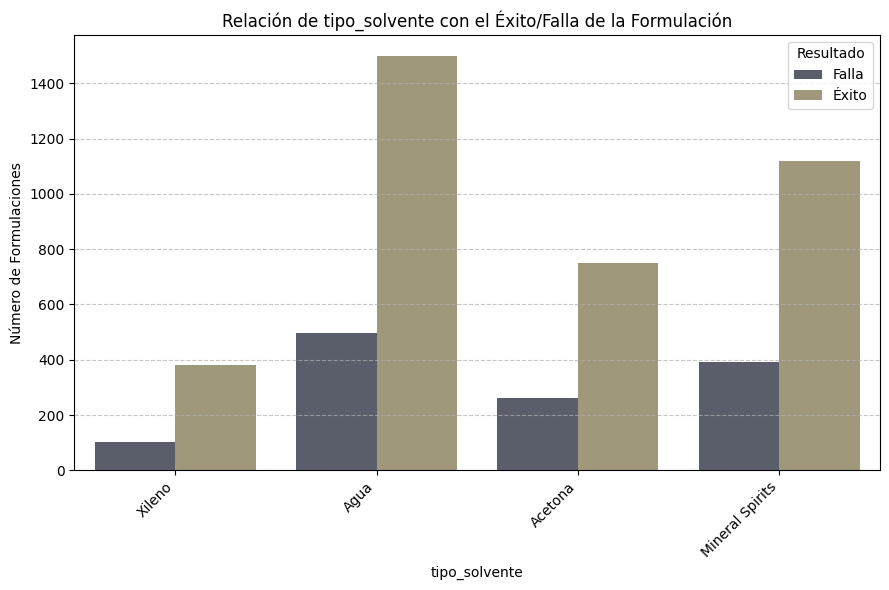

Gráfico 'relacion_tipo_solvente_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre tipo_solvente:
La elección del 'Tipo de Solvente' es crítica. Este análisis revela qué solventes son más comunes en formulaciones exitosas.
Si un solvente como 'Acetona' aparece con muchas fallas, el modelo podría identificarlo como un factor de riesgo.

Análisis para la columna: 'proveedor_aditivo'
proveedor_aditivo
ProveedorB    30.0
ProveedorA    30.0
ProveedorC    20.0
ProveedorD    20.0
Name: proportion, dtype: float64


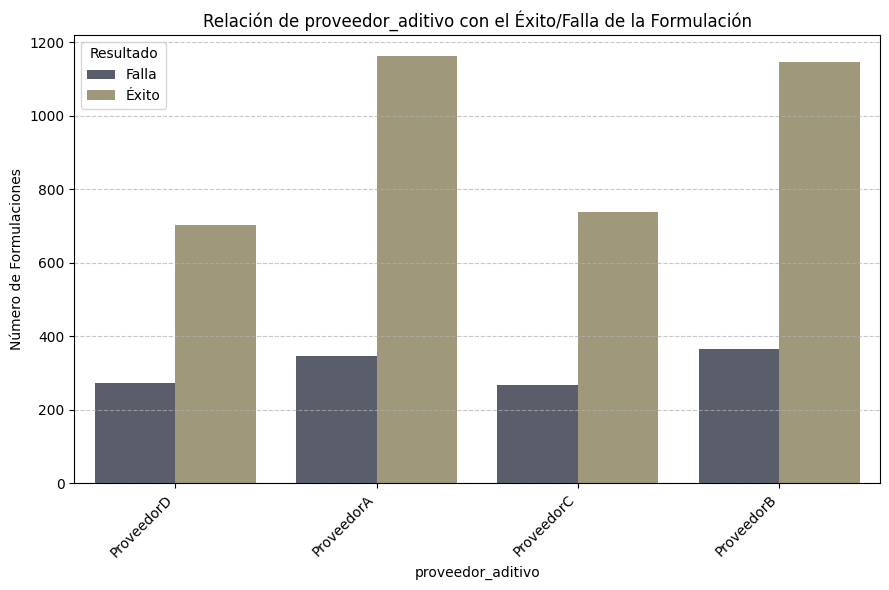

Gráfico 'relacion_proveedor_aditivo_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre proveedor_aditivo:
El 'Proveedor de Aditivo' puede tener un impacto sutil pero importante. Si un proveedor en particular
se asocia consistentemente con resultados negativos, podría indicar una variación en la calidad del insumo.
Esto es una señal de que no solo el tipo de aditivo, sino su origen, importa.


In [4]:
# ------------------------------------------------------------------------------
# 4. Análisis de Variables Categóricas
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("4. ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("--------------------------------------------------")

categorical_cols = ['calidad_resina', 'tipo_pigmento', 'tipo_solvente', 'proveedor_aditivo']

for col in categorical_cols:
    print(f"\nAnálisis para la columna: '{col}'")
    print(df[col].value_counts(normalize=True).round(2) * 100)

    plt.figure(figsize=(9, 6))
    sns.countplot(x=col, hue='exito', data=df, palette='cividis')
    plt.title(f'Relación de {col} con el Éxito/Falla de la Formulación')
    plt.xlabel(col)
    plt.ylabel('Número de Formulaciones')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Resultado', labels=['Falla', 'Éxito'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f'relacion_{col}_exito.png'))
    plt.show()
    print(f"Gráfico 'relacion_{col}_exito.png' guardado en {plots_dir}")

    print(f"\nExplicación para Leonardo sobre {col}:")
    if col == 'calidad_resina':
        print("Este gráfico muestra cómo la 'Calidad de la Resina' influye en el éxito. Podemos observar, por ejemplo,")
        print("que una 'Resina de Alta Calidad' tiene una mayor proporción de éxitos. Esto confirma su importancia como químico formulador.")
        print("El modelo debería aprender a darle peso a esta característica.")
    elif col == 'tipo_pigmento':
        print("Aquí vemos la relación entre el 'Tipo de Pigmento' y el resultado. Algunos pigmentos podrían ser más propensos")
        print("a funcionar bien en ciertas formulaciones. Por ejemplo, el Dióxido de Titanio podría aparecer más en éxitos.")
        print("Esto es clave para entender qué pigmentos son más fiables para lograr los objetivos deseados.")
    elif col == 'tipo_solvente':
        print("La elección del 'Tipo de Solvente' es crítica. Este análisis revela qué solventes son más comunes en formulaciones exitosas.")
        print("Si un solvente como 'Acetona' aparece con muchas fallas, el modelo podría identificarlo como un factor de riesgo.")
    elif col == 'proveedor_aditivo':
        print("El 'Proveedor de Aditivo' puede tener un impacto sutil pero importante. Si un proveedor en particular")
        print("se asocia consistentemente con resultados negativos, podría indicar una variación en la calidad del insumo.")
        print("Esto es una señal de que no solo el tipo de aditivo, sino su origen, importa.")



--------------------------------------------------
5. ANÁLISIS DE VARIABLES NUMÉRICAS
--------------------------------------------------

Visualizando la distribución de las variables numéricas:


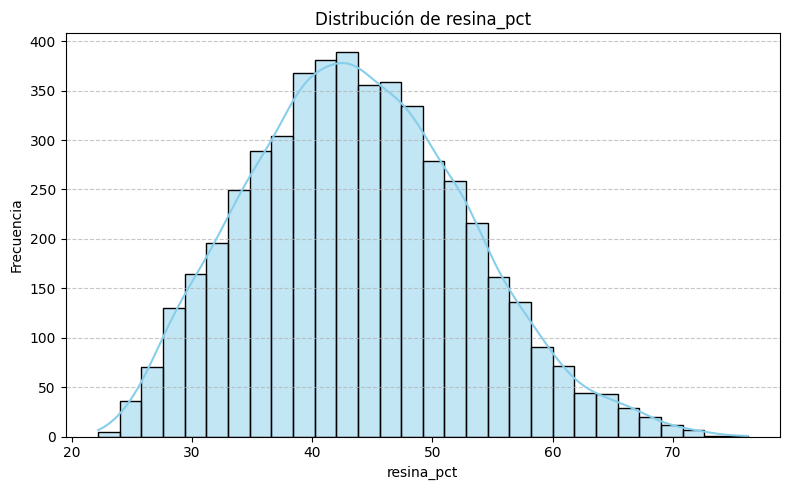

Gráfico 'distribucion_resina_pct.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


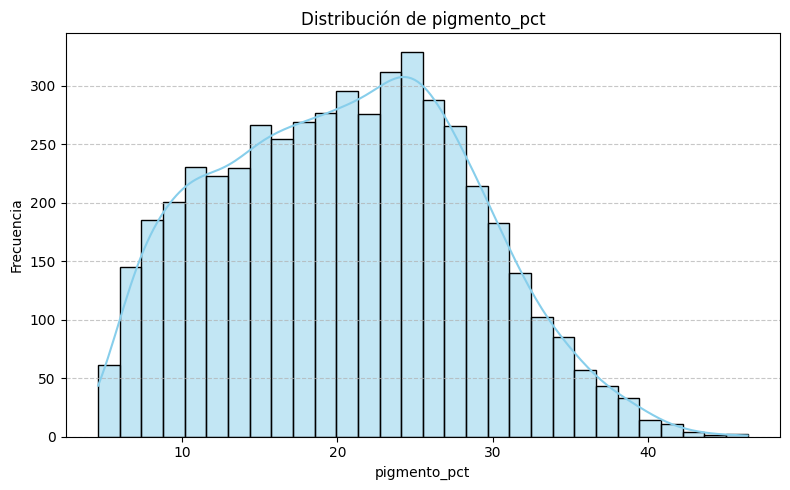

Gráfico 'distribucion_pigmento_pct.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


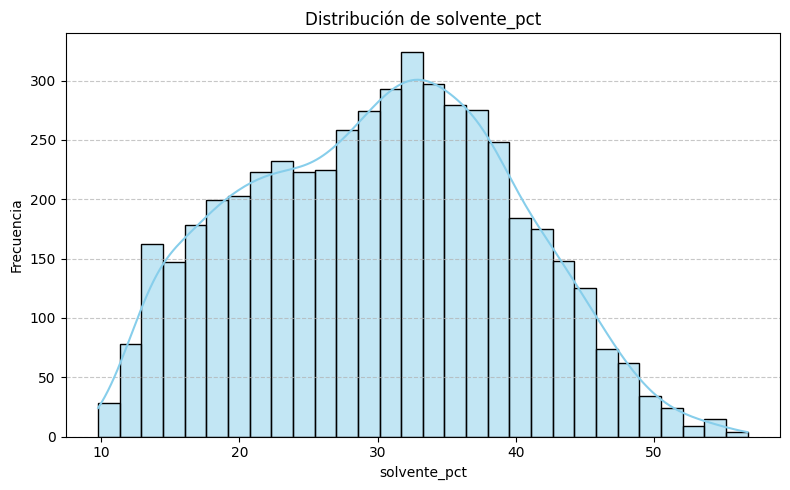

Gráfico 'distribucion_solvente_pct.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


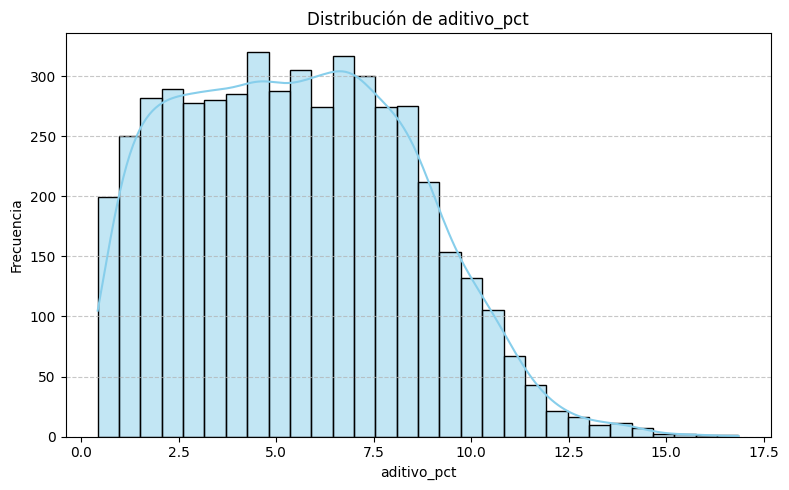

Gráfico 'distribucion_aditivo_pct.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


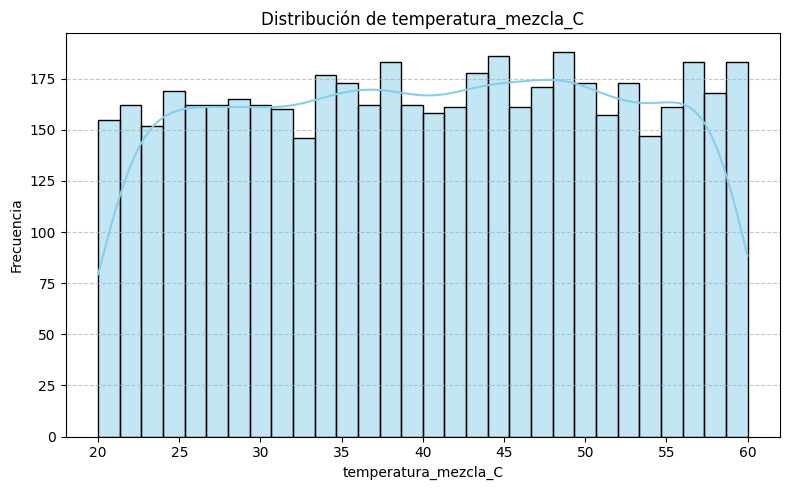

Gráfico 'distribucion_temperatura_mezcla_C.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


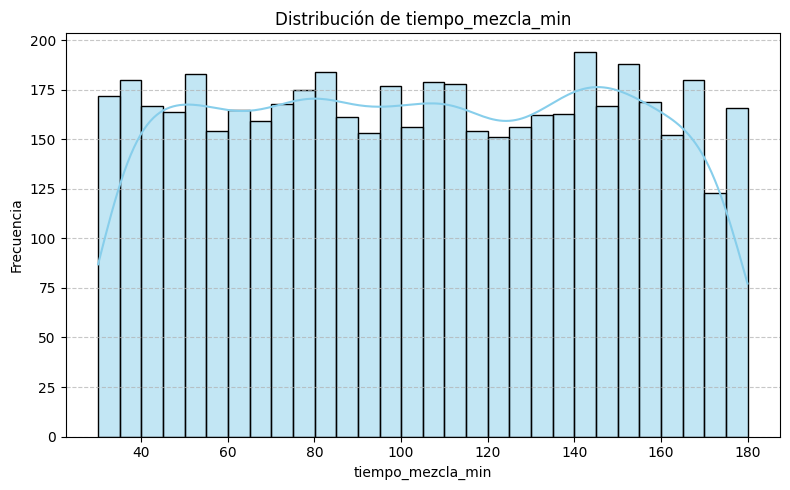

Gráfico 'distribucion_tiempo_mezcla_min.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


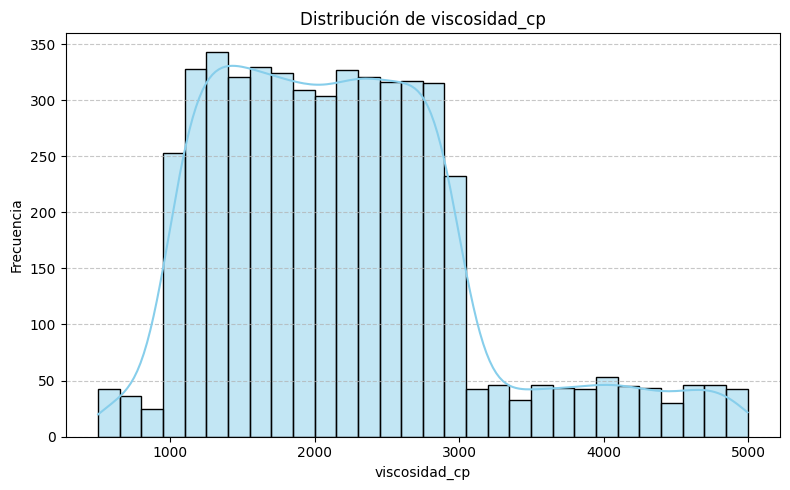

Gráfico 'distribucion_viscosidad_cp.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


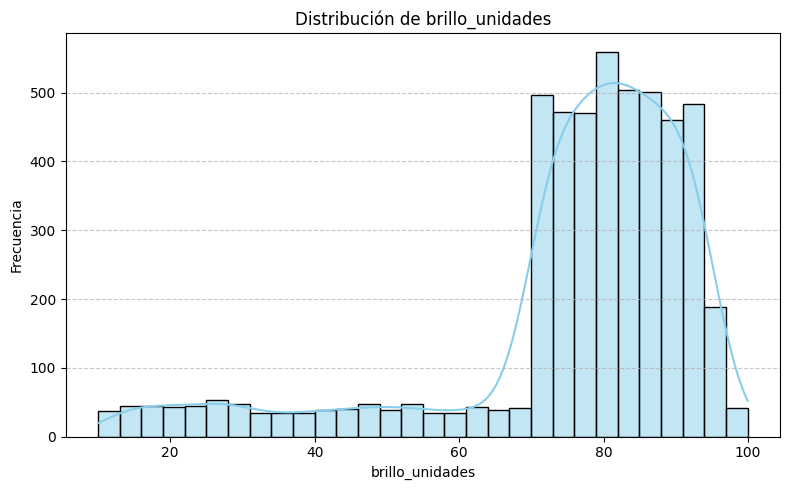

Gráfico 'distribucion_brillo_unidades.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


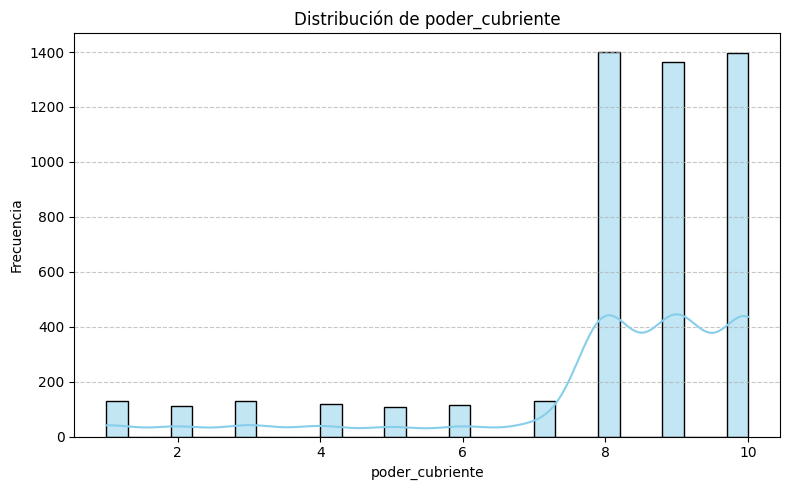

Gráfico 'distribucion_poder_cubriente.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


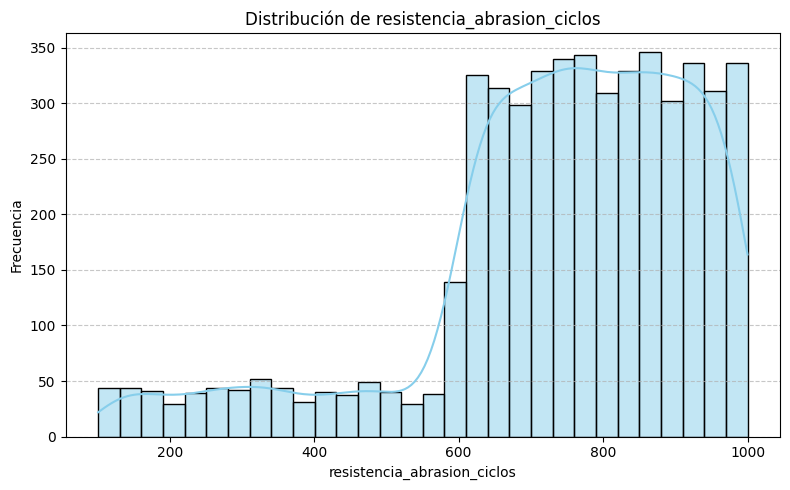

Gráfico 'distribucion_resistencia_abrasion_ciclos.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots


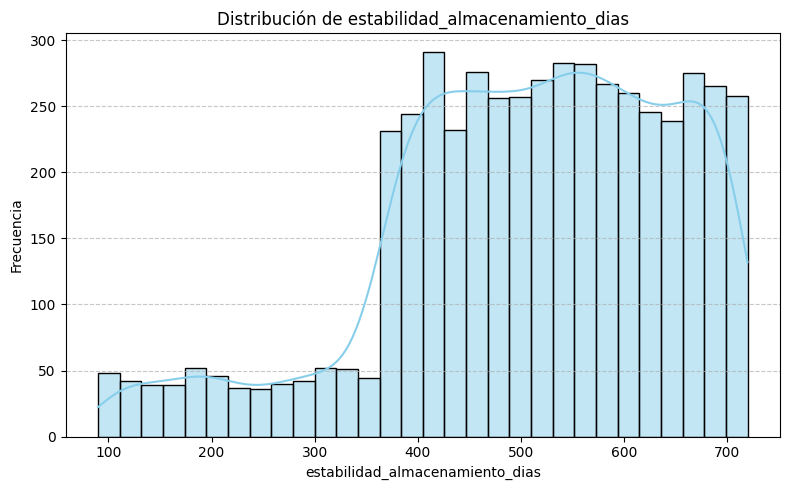

Gráfico 'distribucion_estabilidad_almacenamiento_dias.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Visualizando la relación de variables numéricas con Éxito/Falla (Boxplots):


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


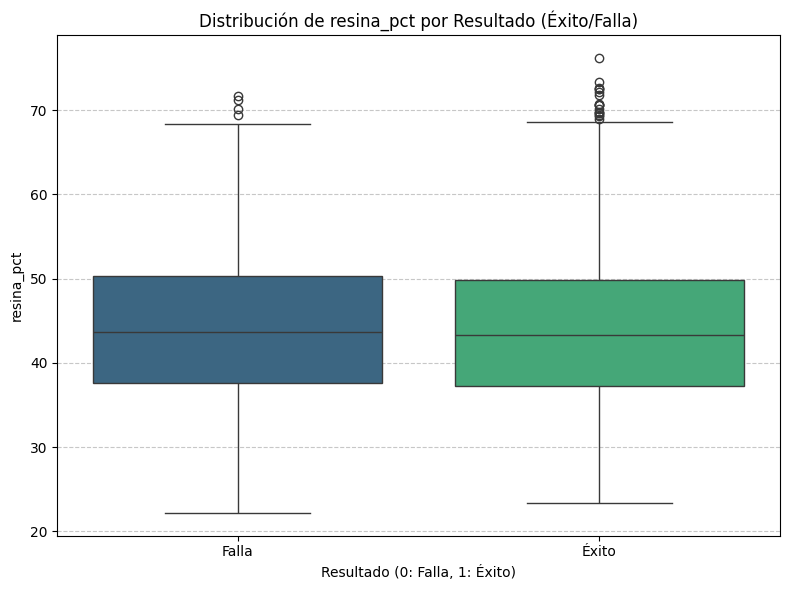

Gráfico 'boxplot_resina_pct_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'resina_pct' y su relación con el éxito:
Para 'resina_pct', los boxplots muestran los rangos típicos de porcentaje para formulaciones exitosas vs. fallidas.
Podemos observar si existe una 'ventana' de porcentaje óptimo para este componente en las formulaciones exitosas.
Esto es crucial para usted como formulador, ya que le ayuda a ajustar las proporciones.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


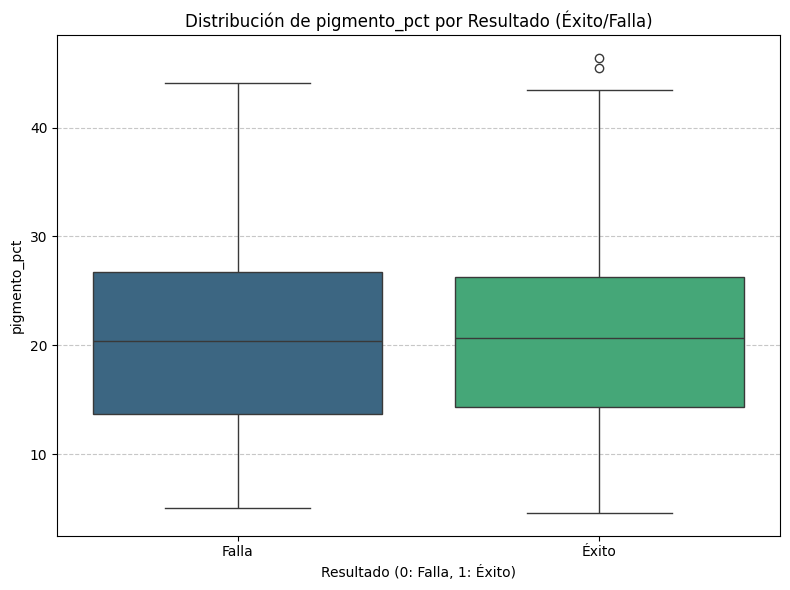

Gráfico 'boxplot_pigmento_pct_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'pigmento_pct' y su relación con el éxito:
Para 'pigmento_pct', los boxplots muestran los rangos típicos de porcentaje para formulaciones exitosas vs. fallidas.
Podemos observar si existe una 'ventana' de porcentaje óptimo para este componente en las formulaciones exitosas.
Esto es crucial para usted como formulador, ya que le ayuda a ajustar las proporciones.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


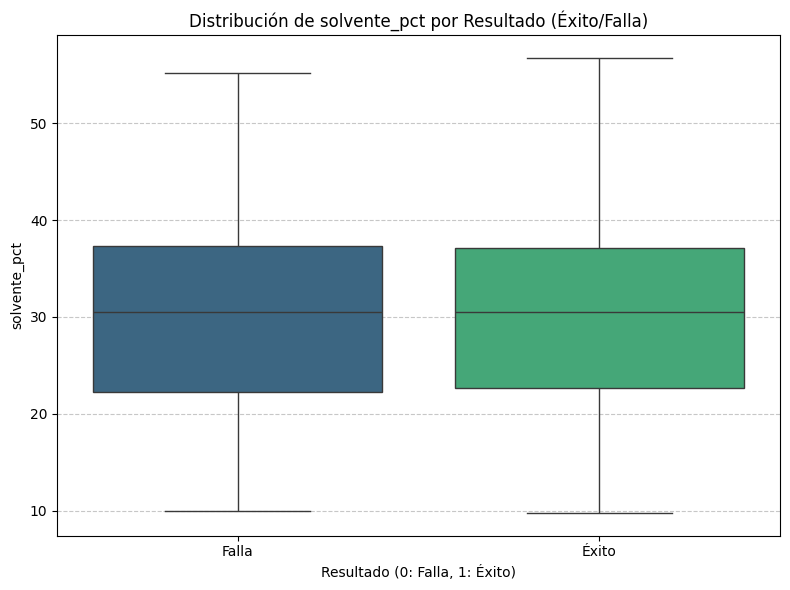

Gráfico 'boxplot_solvente_pct_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'solvente_pct' y su relación con el éxito:
Para 'solvente_pct', los boxplots muestran los rangos típicos de porcentaje para formulaciones exitosas vs. fallidas.
Podemos observar si existe una 'ventana' de porcentaje óptimo para este componente en las formulaciones exitosas.
Esto es crucial para usted como formulador, ya que le ayuda a ajustar las proporciones.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


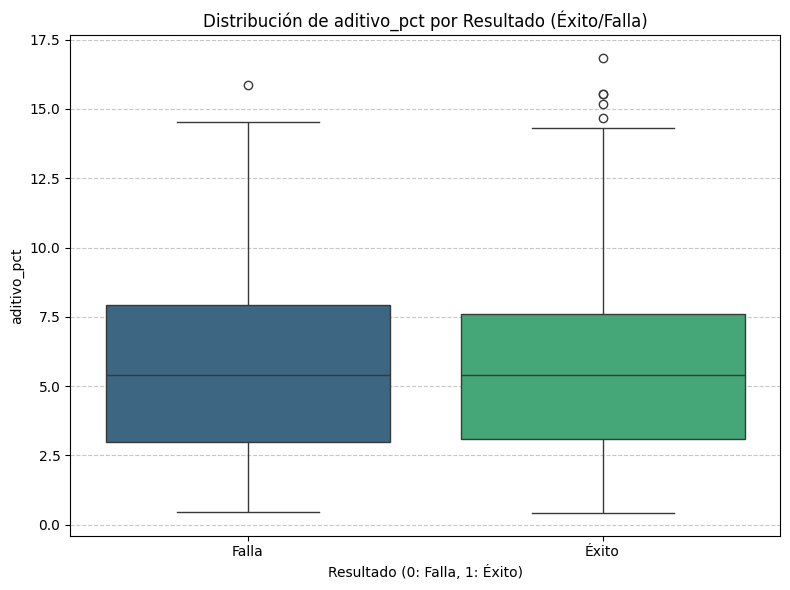

Gráfico 'boxplot_aditivo_pct_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'aditivo_pct' y su relación con el éxito:
Para 'aditivo_pct', los boxplots muestran los rangos típicos de porcentaje para formulaciones exitosas vs. fallidas.
Podemos observar si existe una 'ventana' de porcentaje óptimo para este componente en las formulaciones exitosas.
Esto es crucial para usted como formulador, ya que le ayuda a ajustar las proporciones.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


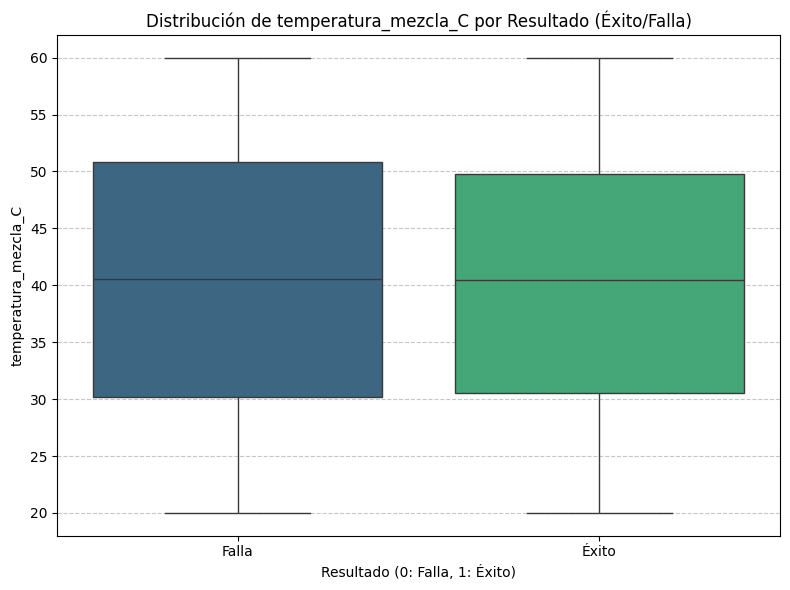

Gráfico 'boxplot_temperatura_mezcla_C_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'temperatura_mezcla_C' y su relación con el éxito:
La 'Temperatura de Mezcla' es una variable de proceso. Si hay una diferencia clara entre los rangos
de temperatura para éxitos y fallas, sugiere que la temperatura óptima es vital para el resultado.
Un proceso bien controlado es tan importante como los ingredientes.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


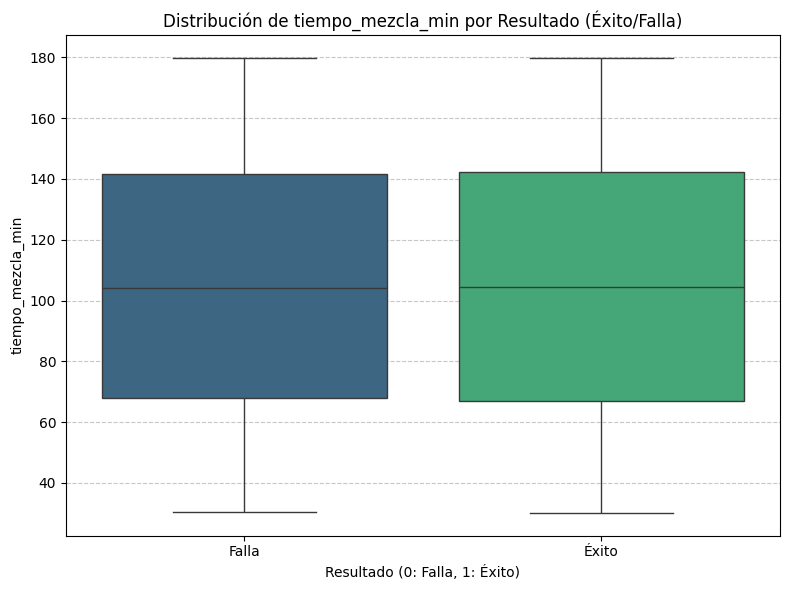

Gráfico 'boxplot_tiempo_mezcla_min_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'tiempo_mezcla_min' y su relación con el éxito:
Similar a la temperatura, el 'Tiempo de Mezcla' puede ser un factor crítico. Un tiempo insuficiente
o excesivo podría llevar a la falla. Este gráfico le ayudará a identificar el rango de tiempo ideal.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


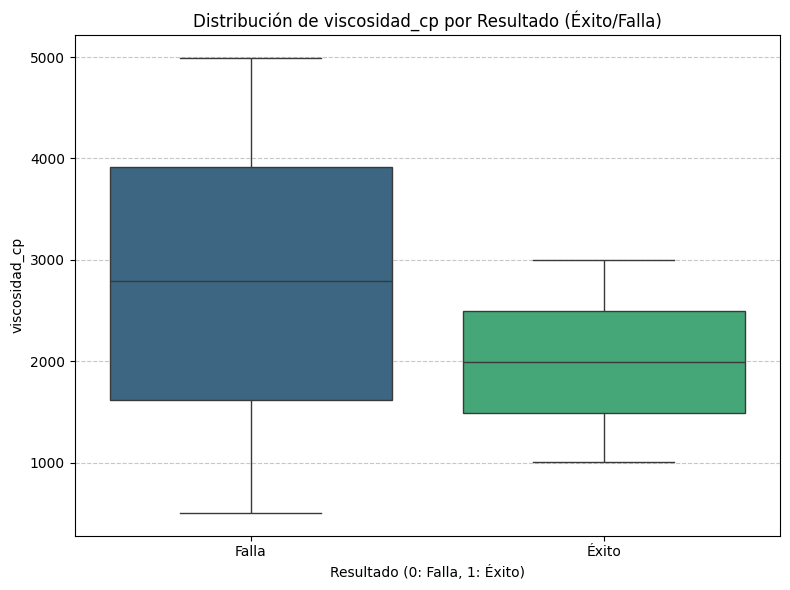

Gráfico 'boxplot_viscosidad_cp_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'viscosidad_cp' y su relación con el éxito:
Para 'viscosidad_cp', vemos la distribución de esta propiedad final de la pintura en formulaciones exitosas y fallidas.
Si las fórmulas exitosas tienden a tener viscosidad_cp en un rango deseable (ej. alto brillo, buena estabilidad),
el modelo aprenderá a buscar estas características finales como indicadores de éxito.
Esto valida que las propiedades que usted mide son las que el modelo usa para predecir.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


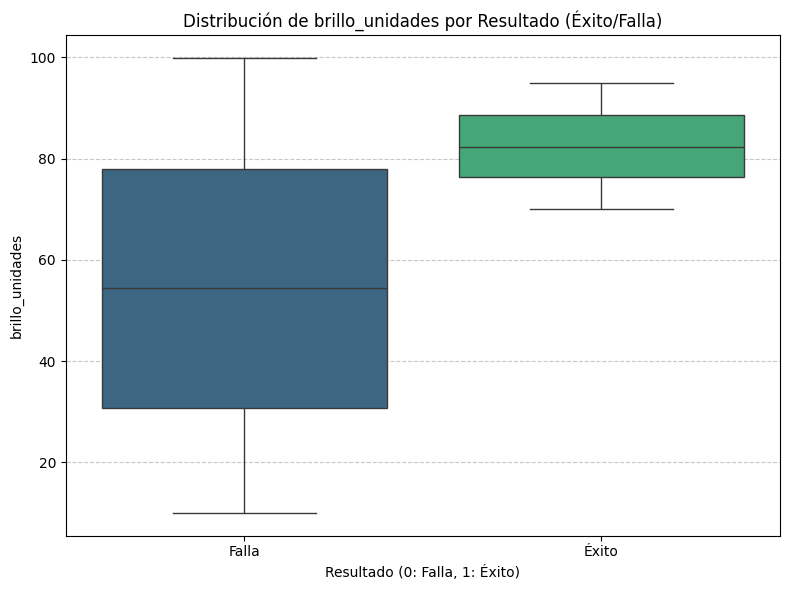

Gráfico 'boxplot_brillo_unidades_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'brillo_unidades' y su relación con el éxito:
Para 'brillo_unidades', vemos la distribución de esta propiedad final de la pintura en formulaciones exitosas y fallidas.
Si las fórmulas exitosas tienden a tener brillo_unidades en un rango deseable (ej. alto brillo, buena estabilidad),
el modelo aprenderá a buscar estas características finales como indicadores de éxito.
Esto valida que las propiedades que usted mide son las que el modelo usa para predecir.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


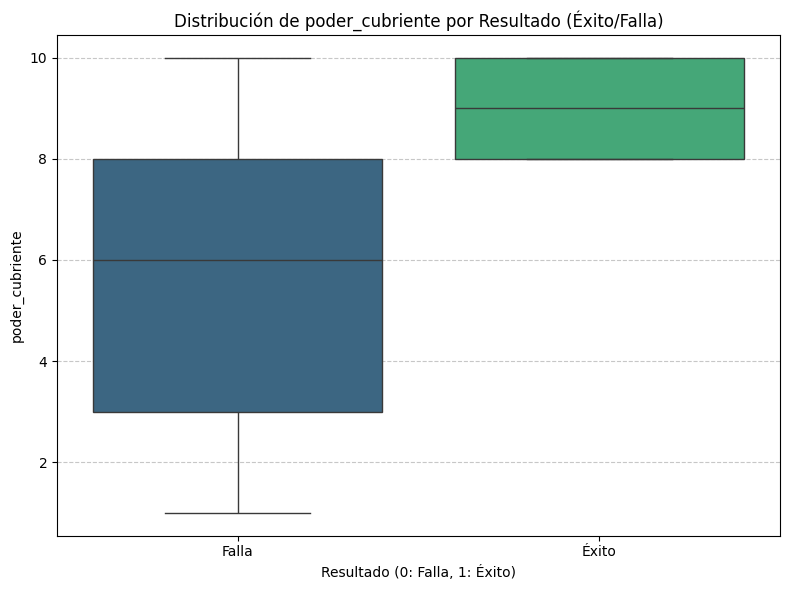

Gráfico 'boxplot_poder_cubriente_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'poder_cubriente' y su relación con el éxito:
Para 'poder_cubriente', vemos la distribución de esta propiedad final de la pintura en formulaciones exitosas y fallidas.
Si las fórmulas exitosas tienden a tener poder_cubriente en un rango deseable (ej. alto brillo, buena estabilidad),
el modelo aprenderá a buscar estas características finales como indicadores de éxito.
Esto valida que las propiedades que usted mide son las que el modelo usa para predecir.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


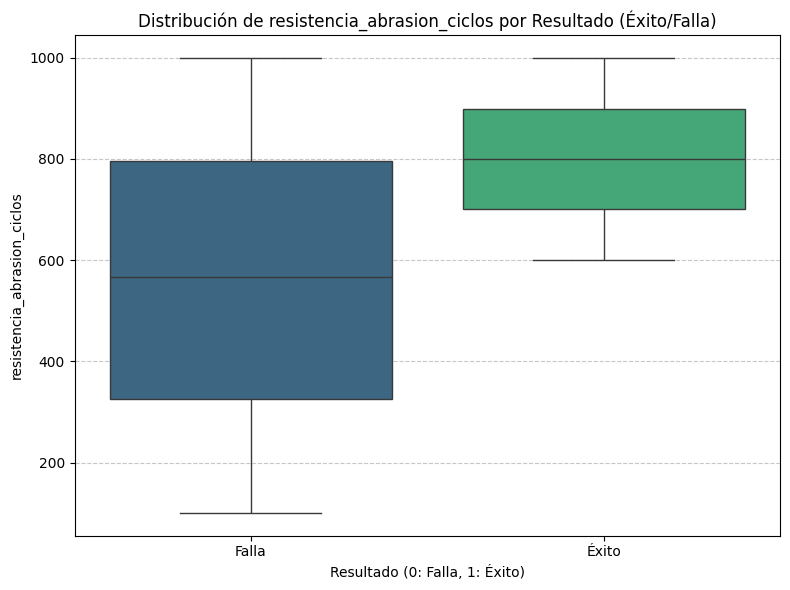

Gráfico 'boxplot_resistencia_abrasion_ciclos_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'resistencia_abrasion_ciclos' y su relación con el éxito:
Para 'resistencia_abrasion_ciclos', vemos la distribución de esta propiedad final de la pintura en formulaciones exitosas y fallidas.
Si las fórmulas exitosas tienden a tener resistencia_abrasion_ciclos en un rango deseable (ej. alto brillo, buena estabilidad),
el modelo aprenderá a buscar estas características finales como indicadores de éxito.
Esto valida que las propiedades que usted mide son las que el modelo usa para predecir.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_3460\840538338.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exito', y=col, data=df, palette='viridis')


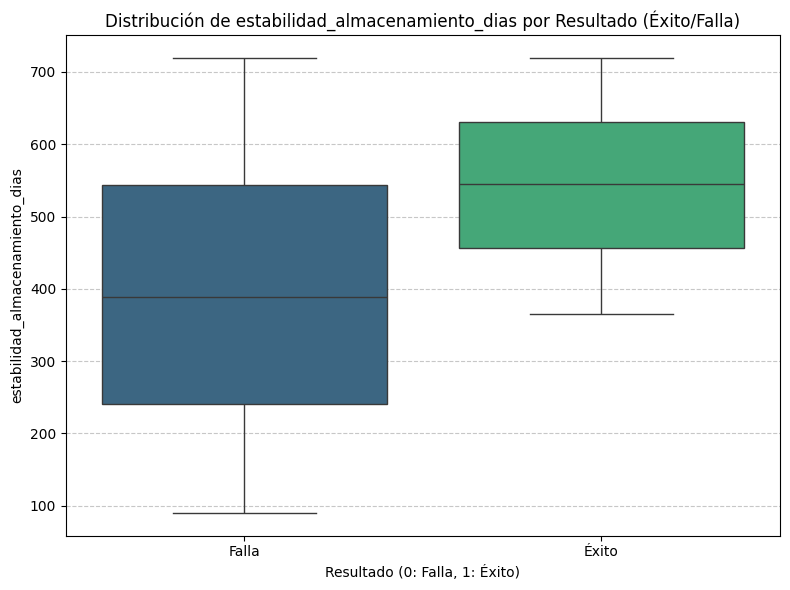

Gráfico 'boxplot_estabilidad_almacenamiento_dias_exito.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre 'estabilidad_almacenamiento_dias' y su relación con el éxito:
Para 'estabilidad_almacenamiento_dias', vemos la distribución de esta propiedad final de la pintura en formulaciones exitosas y fallidas.
Si las fórmulas exitosas tienden a tener estabilidad_almacenamiento_dias en un rango deseable (ej. alto brillo, buena estabilidad),
el modelo aprenderá a buscar estas características finales como indicadores de éxito.
Esto valida que las propiedades que usted mide son las que el modelo usa para predecir.


In [5]:
# ------------------------------------------------------------------------------
# 5. Análisis de Variables Numéricas
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("5. ANÁLISIS DE VARIABLES NUMÉRICAS")
print("--------------------------------------------------")

numerical_cols = [
    'resina_pct', 'pigmento_pct', 'solvente_pct', 'aditivo_pct',
    'temperatura_mezcla_C', 'tiempo_mezcla_min',
    'viscosidad_cp', 'brillo_unidades', 'poder_cubriente',
    'resistencia_abrasion_ciclos', 'estabilidad_almacenamiento_dias'
]

# Histogramas para ver la distribución de cada variable numérica
print("\nVisualizando la distribución de las variables numéricas:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f'distribucion_{col}.png'))
    plt.show()
    print(f"Gráfico 'distribucion_{col}.png' guardado en {plots_dir}")

# Boxplots para ver la distribución y outliers por clase (Éxito/Falla)
print("\nVisualizando la relación de variables numéricas con Éxito/Falla (Boxplots):")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='exito', y=col, data=df, palette='viridis')
    plt.title(f'Distribución de {col} por Resultado (Éxito/Falla)')
    plt.xlabel('Resultado (0: Falla, 1: Éxito)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Falla', 'Éxito'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f'boxplot_{col}_exito.png'))
    plt.show()
    print(f"Gráfico 'boxplot_{col}_exito.png' guardado en {plots_dir}")

    print(f"\nExplicación para Leonardo sobre '{col}' y su relación con el éxito:")
    if '_pct' in col:
        print(f"Para '{col}', los boxplots muestran los rangos típicos de porcentaje para formulaciones exitosas vs. fallidas.")
        print(f"Podemos observar si existe una 'ventana' de porcentaje óptimo para este componente en las formulaciones exitosas.")
        print("Esto es crucial para usted como formulador, ya que le ayuda a ajustar las proporciones.")
    elif col == 'temperatura_mezcla_C':
        print("La 'Temperatura de Mezcla' es una variable de proceso. Si hay una diferencia clara entre los rangos")
        print("de temperatura para éxitos y fallas, sugiere que la temperatura óptima es vital para el resultado.")
        print("Un proceso bien controlado es tan importante como los ingredientes.")
    elif col == 'tiempo_mezcla_min':
        print("Similar a la temperatura, el 'Tiempo de Mezcla' puede ser un factor crítico. Un tiempo insuficiente")
        print("o excesivo podría llevar a la falla. Este gráfico le ayudará a identificar el rango de tiempo ideal.")
    elif col in ['viscosidad_cp', 'brillo_unidades', 'poder_cubriente', 'resistencia_abrasion_ciclos', 'estabilidad_almacenamiento_dias']:
        print(f"Para '{col}', vemos la distribución de esta propiedad final de la pintura en formulaciones exitosas y fallidas.")
        print(f"Si las fórmulas exitosas tienden a tener {col} en un rango deseable (ej. alto brillo, buena estabilidad),")
        print("el modelo aprenderá a buscar estas características finales como indicadores de éxito.")
        print("Esto valida que las propiedades que usted mide son las que el modelo usa para predecir.")



--------------------------------------------------
6. MATRIZ DE CORRELACIÓN
--------------------------------------------------


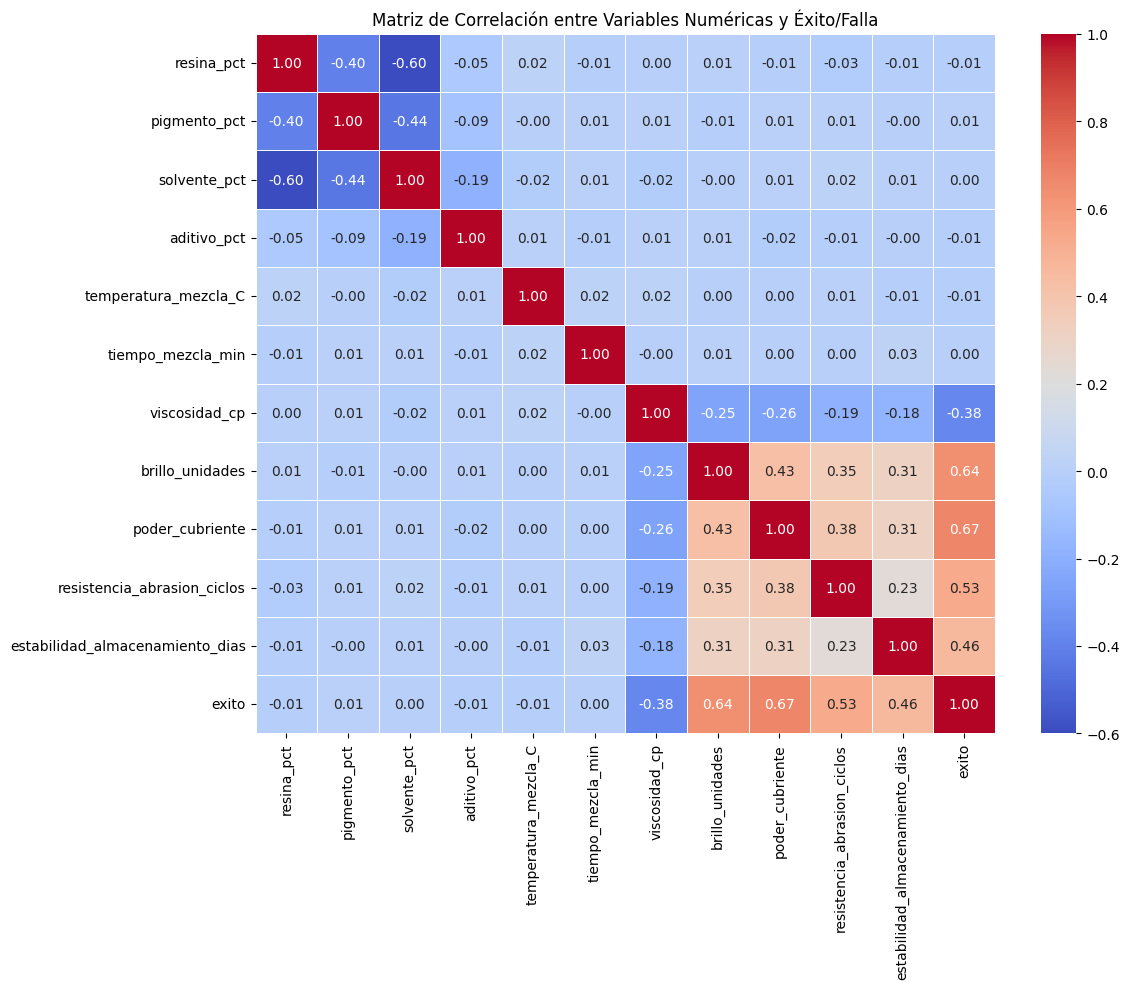

Gráfico 'matriz_correlacion.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo sobre la Matriz de Correlación:
Esta matriz muestra las relaciones lineales entre todas las variables numéricas y el resultado ('exito').
Los valores cercanos a 1 o -1 indican una fuerte correlación (positiva o negativa), mientras que los cercanos a 0 indican poca.
Por ejemplo, si 'brillo_unidades' tiene una correlación positiva fuerte con 'exito' (cercana a 1),
significa que a mayor brillo, mayor la probabilidad de éxito. Esto le ayuda a identificar qué propiedades de la fórmula
y qué ingredientes/procesos (si se correlacionan entre sí) son los más influyentes en el resultado final. No siempre la correlación implica causalidad, pero sí es un fuerte indicador.

--------------------------------------------------
EDA COMPLETADO.
Revisa los gráficos generados en la carpeta 'plots/' y las explicaciones en este notebook.
-------------------------------------

In [6]:
# ------------------------------------------------------------------------------
# 6. Matriz de Correlación (para variables numéricas)
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("6. MATRIZ DE CORRELACIÓN")
print("--------------------------------------------------")

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = df[numerical_cols + ['exito']].corr().round(2)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas y Éxito/Falla')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'matriz_correlacion.png'))
plt.show()
print(f"Gráfico 'matriz_correlacion.png' guardado en {plots_dir}")

print("\nExplicación para Leonardo sobre la Matriz de Correlación:")
print("Esta matriz muestra las relaciones lineales entre todas las variables numéricas y el resultado ('exito').")
print("Los valores cercanos a 1 o -1 indican una fuerte correlación (positiva o negativa), mientras que los cercanos a 0 indican poca.")
print("Por ejemplo, si 'brillo_unidades' tiene una correlación positiva fuerte con 'exito' (cercana a 1),")
print("significa que a mayor brillo, mayor la probabilidad de éxito. Esto le ayuda a identificar qué propiedades de la fórmula")
print("y qué ingredientes/procesos (si se correlacionan entre sí) son los más influyentes en el resultado final. No siempre la correlación implica causalidad, pero sí es un fuerte indicador.")

print("\n--------------------------------------------------")
print("EDA COMPLETADO.")
print("Revisa los gráficos generados en la carpeta 'plots/' y las explicaciones en este notebook.")
print("--------------------------------------------------")